In [11]:
import datetime as dt
import numpy as np
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from flask import Flask, jsonify
from flask import Flask, render_template
import psycopg2
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, output_file, show
import matplotlib.pyplot as plt


In [8]:
t_host = "provisionaldb2.cpvxmi357s0k.us-east-2.rds.amazonaws.com" # either "localhost", a domain name, or an IP address.
t_port = "5432" # default postgres port
t_dbname = "GroupProjectDB"
t_user = "postgres"
t_pw = "postgres"
db_conn = psycopg2.connect(host=t_host, port=t_port, dbname=t_dbname, user=t_user, password=t_pw)
db_cursor = db_conn.cursor()

In [9]:
# Read data from PostgreSQL database table and load into a DataFrame instance
DashboardDataDF =  pd.read_sql("select * from \"turnoutanalysisdata\"", db_conn)
PercentRegisteredData =  [DashboardDataDF["electionyear"],DashboardDataDF["stateabbreviation"], DashboardDataDF["statename"] , DashboardDataDF["pct_reg_of_vep_vrs"]]
PercentRegisteredHeaders = ["ElectionYear","StateAbbreviation","StateName","PercentOfRegisteredVoters" ]
PercentRegisteredDF = pd.concat(PercentRegisteredData, axis=1, keys=PercentRegisteredHeaders)

In [10]:
PercentRegisteredDF

,ElectionYear,StateAbbreviation,StateName,PercentOfRegisteredVoters
0,2008,AL,Alabama,0.852208
1,2008,AK,Alaska,0.875693
2,2008,AZ,Arizona,0.829416
3,2008,AR,Arkansas,0.742385
4,2008,CA,California,0.824846
...,...,...,...,...
296,2018,VA,Virginia,0.874413
297,2018,WA,Washington,0.855181
298,2018,WV,West Virginia,0.778394
299,2018,WI,Wisconsin,0.828831


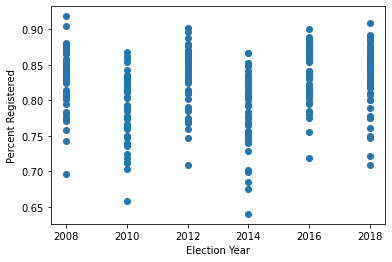

In [12]:
plt.scatter(PercentRegisteredDF.ElectionYear, PercentRegisteredDF.PercentOfRegisteredVoters)
plt.xlabel('Election Year')
plt.ylabel('Percent Registered')
plt.show()

In [13]:
PercentRegisteredDF2008=PercentRegisteredDF[PercentRegisteredDF['ElectionYear']==2008]

In [14]:
PercentRegisteredDF2008

,ElectionYear,StateAbbreviation,StateName,PercentOfRegisteredVoters
0,2008,AL,Alabama,0.852208
1,2008,AK,Alaska,0.875693
2,2008,AZ,Arizona,0.829416
3,2008,AR,Arkansas,0.742385
4,2008,CA,California,0.824846
5,2008,CO,Colorado,0.840033
6,2008,CT,Connecticut,0.855638
7,2008,DE,Delaware,0.857940
8,2008,FL,Florida,0.876890
9,2008,GA,Georgia,0.849353


In [17]:
PercentRegisteredDF2008.plot(x=PercentRegisteredDF2008.StateName, y=PercentRegisteredDF2008.PercentOfRegisteredVoters, kind="bar")

KeyError: "None of [Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',\n       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',\n       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',\n       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',\n       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',\n       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',\n       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',\n       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',\n       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',\n       'West Virginia', 'Wisconsin', 'Wyoming'],\n      dtype='object')] are in the [columns]"